In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import xarray as xr

In [3]:
file = "data/area_files/pss25area_v3.dat"
data = []
with open(file, "rb") as binary_file:
    for i in range(int(len(list(binary_file.read()))/4)):
        binary_file.seek(i*4)
        data += [struct.unpack('i', binary_file.read(4))[0]]

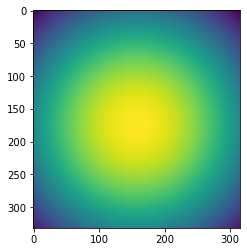

In [4]:
data = np.array(data).reshape(332,316)
plt.imshow(data)
plt.show()

In [5]:
xarr = xr.DataArray(data, 
                      coords={'x': 10*np.arange(-395000, 395000, 2500),
                              'y': 10*np.arange( 435000,-395000,-2500)},
                      dims=['y', 'x'])
xarr.name = 'area'

In [6]:
xarr.to_netcdf('data/area_files/processed_nsidc.nc')